                                                             Бояринцев Дмитрий Федорович

#                                    Лабораторная работа №5

In [7]:
import os
import random
import numpy as np
import datetime
from collections import Counter
import string
import matplotlib.pyplot as plt

## Массивы Numpy

**1.** Сформировать одномерный массив, состоящий из n вещественных элементов co значением от -10 до 10.0. Для случайного числа y, такого, что *минимальный элемент массива < y < максимальный элемент массива*, вычислить:  
  
* произведение элементов массива, значения модуля которых больше модуля y,  
  
* сумму модулей остальных элементов.

In [2]:
while True:
    try:
        n = int(input("Введите положительное целое число: "))
        if n > 0:
            break
        else:
            print("Число должно быть больше 0! Попробуйте еще раз.")
    except ValueError:
        print("Некорректный ввод! Попробуйте еще раз.")

array = np.random.uniform(-10, 10, n)
print("Сформированный массив:", array)

min_elem = np.min(array)
max_elem = np.max(array)

y = random.uniform(min_elem, max_elem)
print("Случайное число y:", y)

mult = np.prod(np.where(np.abs(array) > np.abs(y), array, 1))
print(f"Произведение элементов массива, модуль которых больше |y| = {mult}")

summa = np.sum(np.where(np.abs(array) <= np.abs(y), array, 0))
print(f"Сумма модулей остальных элементов = {summa}")

Введите положительное целое число:  5


Сформированный массив: [ 2.94451114 -9.45312414 -3.06756184  1.3010874  -6.93750151]
Случайное число y: -5.43489324891183
Произведение элементов массива, модуль которых больше |y| = 65.58106299859996
Сумма модулей остальных элементов = 1.1780366952758339


**2.** Найти максимальный элемент в одномерном массиве x среди элементов, перед которыми стоит нулевой.

In [4]:
while True:
    try:
        n = int(
            input("Введите положительное целое число для определения длины массива: ")
        )
        if n > 0:
            break
        else:
            print("Число должно быть больше 0! Попробуйте еще раз.")
    except ValueError:
        print("Некорректный ввод! Попробуйте еще раз.")

print(
    "Введи два числа через пробел - диапазон элементов массива [a, b]",
)
d = input().split()
x = np.random.randint(int(d[0]), int(d[1]) + 1, (n,))
print("x = ", x)
# Нахождение максимального значения элементов массива, перед которыми стоит нулевой
zero = x == 0
maximum = np.max(x[1:][zero[:-1]])
print("максимальный элемент массива, перед которым стоит нулевой = ", maximum)

Введите положительное целое число для определения длины массива:  10


Введи два числа через пробел - диапазон элементов массива [a, b]


 -5 5


x =  [ 1  0  3  3  2  2 -1 -4  4  4]
максимальный элемент массива, перед которым стоит нулевой =  3


**3.** Дана целочисленная прямоугольная матрица. Определить: количество строк, не содержащих ни одного нулевого элемента, а также 
максимальное значение из чисел, встречающихся в заданной матрице более одного раза.

In [6]:
# matrix = np.array([[4, 5, 6], [2, 9, 0], [4, 0, 7]])
# print(matrix)


def generate_integer_matrix(rows, cols, low, high):
    matrix = np.random.randint(low, high, size=(rows, cols))
    return matrix


rows = 5  # Количество строк
cols = 5  # Количество столбцов
low = -10  # Нижняя граница
high = 10  # Верхняя граница

matrix = generate_integer_matrix(rows, cols, low, high)
print(matrix)

# **Определение количества строк без нулевых элементов**
non_zero_rows_count = np.sum(~np.any(matrix == 0, axis=1))

# **Поиск максимального значения среди чисел, встречающихся более одного раза**
unique, counts = np.unique(matrix, return_counts=True)
max_value_multiple_occurrences = (
    unique[counts > 1].max() if np.any(counts > 1) else None
)

print(f"Количество строк без нулевых элементов: {non_zero_rows_count}")
print(f"Максимальное значение из чисел, встречающихся более одного раза: {max_value_multiple_occurrences}")

[[-2 -3 -1 -3  0]
 [ 9  8  6  1  7]
 [ 4  2  0  6 -7]
 [-3  0 -6 -6 -4]
 [ 3 -3 -6  7  1]]
Количество строк без нулевых элементов: 2
Максимальное значение из чисел, встречающихся более одного раза: 7


**4.** Элемент матрицы называется локальным минимумом, если он строго меньше всех имеющихся у него соседей. Соседями элемента А[i,j] в матрице назовем элементы А[k,l], где i-1<=k<=i+1, j-1 < l <j+1, (k, l) != (i, j).  
Подсчитать количество локальных минимумов заданной в файле input.txt матрицы размером 10 на 10. Предусмотреть, что в файле данные могут быть введены некорректно.

In [27]:
# ready
def read_matrix_from_file(filename):
    try:
        with open(filename, "r") as file:
            matrix = []
            for line in file:
                # Преобразуем строку в список чисел
                row = list(map(int, line.split()))
                if len(row) != 10:
                    raise ValueError("Каждая строка должна содержать 10 элементов.")
                matrix.append(row)
            if len(matrix) != 10:
                raise ValueError("Матрица должна содержать 10 строк.")
            return matrix
    except Exception as e:
        print(f"Ошибка при чтении файла: {e}")
        return None


def is_local_minimum(matrix, i, j):
    current_value = matrix[i][j]
    neighbors = [
        (i - 1, j - 1),
        (i - 1, j),
        (i - 1, j + 1),
        (i, j - 1),
        (i, j + 1),
        (i + 1, j - 1),
        (i + 1, j),
        (i + 1, j + 1),
    ]

    for x, y in neighbors:
        if 0 <= x < 10 and 0 <= y < 10:  # Проверка границ матрицы
            if matrix[x][y] <= current_value:
                return False
    return True


def count_local_minima(matrix):
    count = 0
    for i in range(10):
        for j in range(10):
            if is_local_minimum(matrix, i, j):
                count += 1
    return count


def main():
    matrix = read_matrix_from_file("5-4/input.txt")
    if matrix is not None:
        local_minima_count = count_local_minima(matrix)
        print(f"Количество локальных минимумов: {local_minima_count}")
        matrix = np.array(matrix)
        print(matrix)


if __name__ == "__main__":
    main()


Ошибка при чтении файла: Матрица должна содержать 10 строк.


**5.** Определите, является ли массив магическим квадратом (суммы по всем горизонталям, вертикалям и двум диагоналям равны).

In [5]:
def is_magic_square(matrix):
    # Преобразуем список в массив NumPy
    arr = np.array(matrix)

    # Проверка на квадратность
    n, m = arr.shape
    if n != m:
        return False

    # Вычисление магической константы
    magic_constant = np.sum(arr[0])

    # Проверка сумм строк
    if not np.all(np.sum(arr, axis=1) == magic_constant):
        return False

    # Проверка сумм столбцов
    if not np.all(np.sum(arr, axis=0) == magic_constant):
        return False

    # Проверка главной диагонали
    if np.sum(np.diag(arr)) != magic_constant:
        return False

    # Проверка побочной диагонали
    if np.sum(np.diag(np.fliplr(arr))) != magic_constant:
        return False

    return True


array = [
    [8, 1, 6],
    [3, 5, 7],
    [4, 9, 2]
]

is_magic_square(square)

if is_magic_square(square) == True:
    print("Массив является магическим квадратом")
else:
    print("Массив не является магическим квадратом")


Массив является магическим квадратом


**6.** Программным образом заполните массив одним из двух следующих способов. Размерность n и m, а также номер способа заполнения вводится пользователем при запуске программы.
Результат записать в файл.

**7.** Удалите строку и столбец, на пересечении которых находится минимальный элемент массива. После этого отсортируйте столбцы массива по неубыванию минимальных элементов в них.

In [14]:
# 1. Создание массива
rows = 5
cols = 5
low = -10
high = 10

matrix = np.random.randint(low, high, size=(rows, cols))
print(matrix)

# 2. Поиск минимального элемента
min_elem = np.min(matrix)
min_index = np.unravel_index(np.argmin(matrix), matrix.shape)
min_row, min_col = min_index

# 3. Удаление строки и столбца
matrix_reduced = np.delete(matrix, min_row, axis=0)  # Удаляем строку
matrix_reduced = np.delete(matrix_reduced, min_col, axis=1)  # Удаляем столбец
print("Массив после удаления строки и столбца:")
print(matrix_reduced)

# 4. Сортировка оставшихся столбцов по неубыванию их минимальных элементов
sorted_indices = np.argsort(np.min(matrix_reduced, axis=0))
matrix_sorted = matrix_reduced[:, sorted_indices]
print("Отсортированный массив по минимальным элементам столбцов:")
print(matrix_sorted)

[[-4  1  1  2 -8]
 [-7  5 -1 -9  0]
 [ 1 -3 -1 -2  2]
 [ 2 -9 -2 -9 -4]
 [ 2 -6  5 -8  3]]
Массив после удаления строки и столбца:
[[-4  1  1 -8]
 [ 1 -3 -1  2]
 [ 2 -9 -2 -4]
 [ 2 -6  5  3]]
Отсортированный массив по минимальным элементам столбцов:
[[ 1 -8 -4  1]
 [-3  2  1 -1]
 [-9 -4  2 -2]
 [-6  3  2  5]]


## Обработка исключений. Библиотека Matplotlib

**8.**	Реализовать проверку числа 35742549198872617291353508656626642567 на простоту последовательным перебором возможных делителей (не нужен эффективный алгоритм). Выполнить замер времени работы кода без обработки исключений и с ней. Можно проводить тестирование на числе 2147483647 или 11111111111111111111111.

In [ ]:
def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True


# Проверка числа
# number = 35742549198872617291353508656626642567
# number = 2147483647
number = 11111111111111111111111

start_time = datetime.datetime.now()
result = is_prime(number)
end_time = datetime.datetime.now()

print(f"Число {number} {'простое' if result else 'составное'}")
print(f"Время выполнения (без обработки исключений): {end_time - start_time} секунд")


In [ ]:
def is_prime(n):
    try:
        if n <= 1:
            return False
        for i in range(2, int(n**0.5) + 1):
            if n % i == 0:
                return False
        return True
    except Exception as e:
        print(f"Произошла ошибка: {e}")
        return False


# Проверка числа
# number = 35742549198872617291353508656626642567
# number = 2147483647
number = 11111111111111111111111

start_time = datetime.datetime.now()
result = is_prime(number)
end_time = datetime.datetime.now()

print(f"Число {number} {'простое' if result else 'составное'}")
print(f"Время выполнения (с обработкой исключений): {end_time - start_time} секунд")


**9.**	В каталоге texts сохранить не менее 10 произвольных текстов объемом не менее 500 слов.  Пользователь программным образом выбирает текст. Программа строит график частоты для 50 наиболее частотных слов текста. 

Выберите текст по индексу (0 - 9):
0: Текст 1
1: Текст 2
2: Текст 3
3: Текст 4
4: Текст 5
5: Текст 6
6: Текст 7
7: Текст 8
8: Текст 9
9: Текст 10


Введите индекс текста:  0


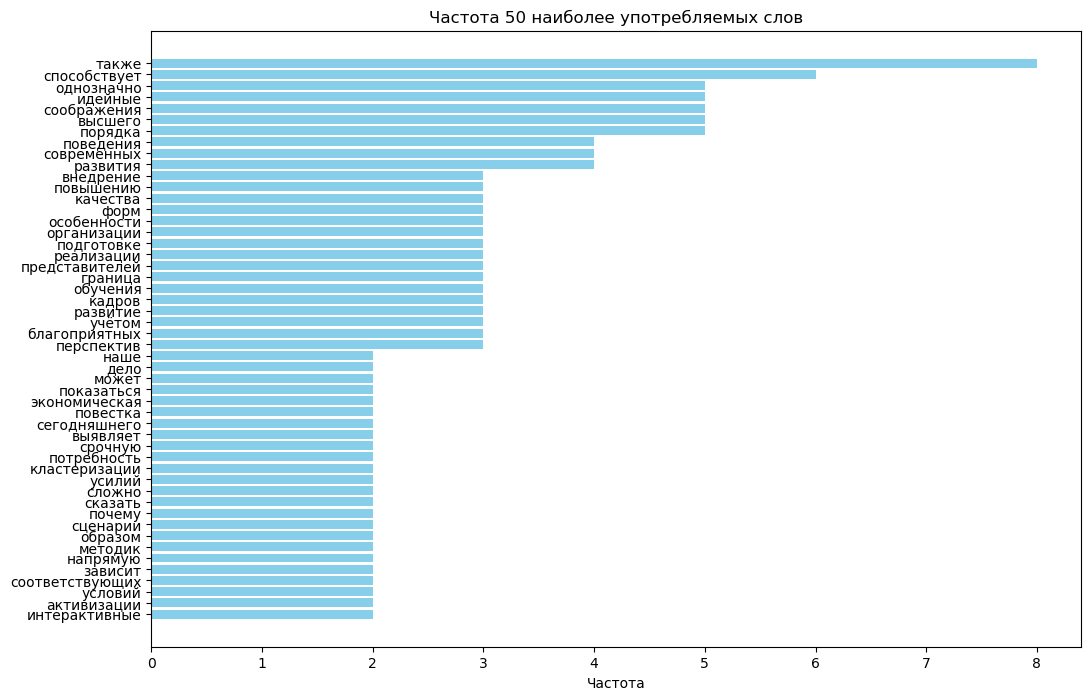

In [17]:
def load_texts(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            with open(os.path.join(directory, filename), "r", encoding="utf-8") as file:
                texts.append(file.read())
    return texts


def select_text(texts, index):
    if 0 <= index < len(texts):
        return texts[index]
    else:
        raise IndexError("Index out of range.")


def preprocess_text(text):
    # Приведение к нижнему регистру и удаление знаков препинания
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text


def plot_word_frequency(text):
    words = preprocess_text(text).split()

    # Фильтрация коротких слов (менее 3 символов)
    filtered_words = [word for word in words if len(word) > 3]

    word_counts = Counter(filtered_words)

    # Получение 50 наиболее частых слов
    most_common_words = word_counts.most_common(50)

    # Разделение на слова и их частоты
    words, counts = zip(*most_common_words)

    plt.figure(figsize=(12, 8))
    plt.barh(words, counts, color="skyblue")
    plt.xlabel("Частота")
    plt.title("Частота 50 наиболее употребляемых слов")
    plt.gca().invert_yaxis()  # Инвертировать ось Y для лучшего отображения
    plt.show()


def main():
    directory = "5-9/text"  # Папка с текстами
    texts = load_texts(directory)

    print("Выберите текст по индексу (0 - {}):".format(len(texts) - 1))
    for i in range(len(texts)):
        print(f"{i}: Текст {i + 1}")

    index = int(input("Введите индекс текста: "))

    try:
        selected_text = select_text(texts, index)
        plot_word_frequency(selected_text)
    except IndexError as e:
        print(e)


if __name__ == "__main__":
    main()


**10.**	Считать данные из текстового документа, в котором написано годовое количество осадков:

*Январь 15*

*Февраль 20*

…

*Декабрь 18*


Вывести их в форме диаграмм: обычная, горизонтальная, круговая (все виды диаграмм должны быть на одном рисунке). Сохранить получившийся рисунок в файл.


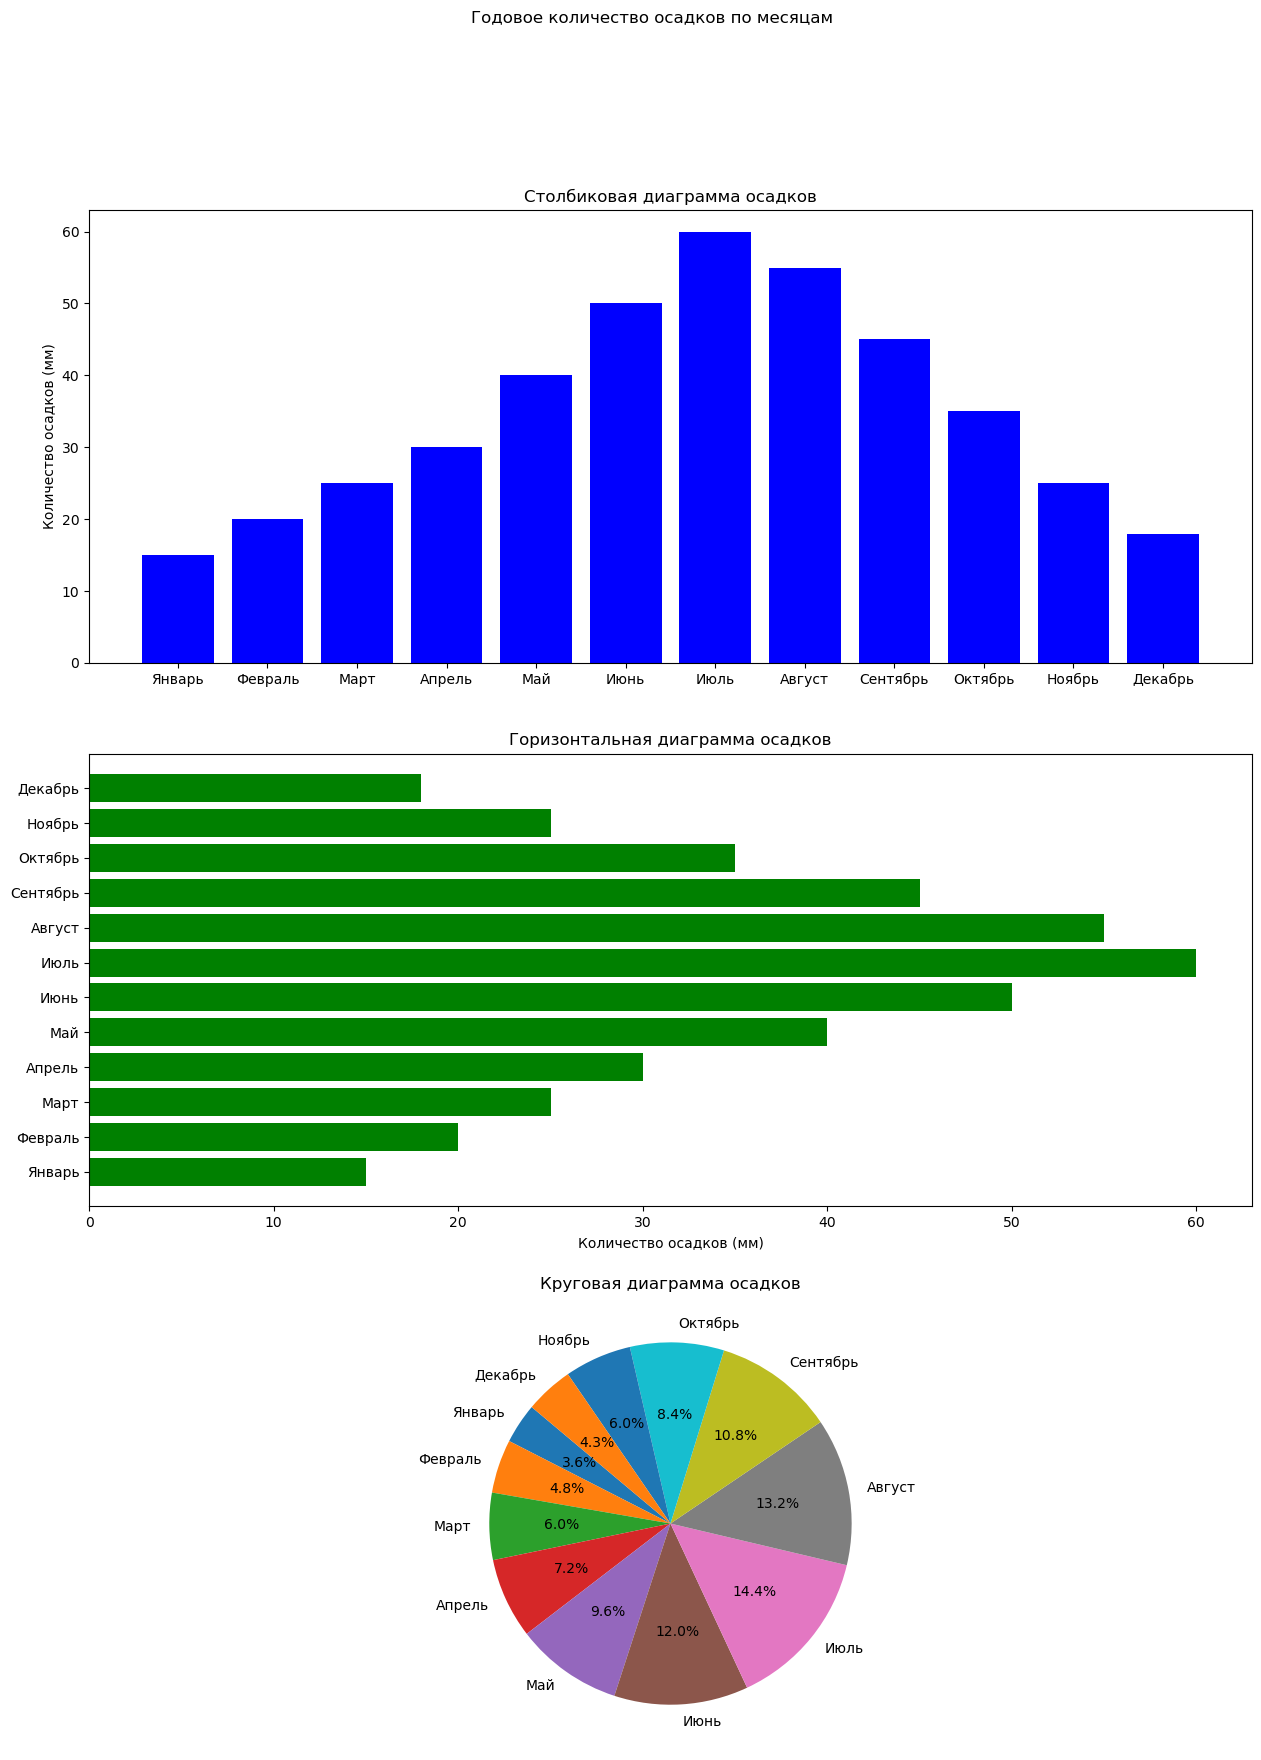

In [11]:
# Функция для чтения данных из файла
def read_precipitation_data(file_path):
    months = []
    precipitation = []
    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            month, value = line.split()
            months.append(month)
            precipitation.append(int(value))
    return months, precipitation


# Чтение данных из файла
file_path = "5-10/data.txt"
months, precipitation = read_precipitation_data(file_path)

# Создание фигуры и осей
fig, axs = plt.subplots(3, 1, figsize=(15, 20))

# Обычная столбиковая диаграмма
axs[0].bar(months, precipitation, color="blue")
axs[0].set_title("Столбиковая диаграмма осадков")
axs[0].set_ylabel("Количество осадков (мм)")

# Горизонтальная диаграмма
axs[1].barh(months, precipitation, color="green")
axs[1].set_title("Горизонтальная диаграмма осадков")
axs[1].set_xlabel("Количество осадков (мм)")

# Круговая диаграмма
axs[2].pie(precipitation, labels=months, autopct="%1.1f%%", startangle=140)
axs[2].set_title("Круговая диаграмма осадков")

# Настройка общего заголовка
plt.suptitle("Годовое количество осадков по месяцам")

# Сохранение рисунка в файл
plt.savefig("5-10/diagrams.png")

# Показать график
plt.show()


**11.** Нарисовать звёздочками зелёного цвета график кардиоиды в полярной системе координат. Добавьте легенду с заголовком «Функция» и подписью «Кардиоида» в левый верхний угол.
Угол принадлежит промежутку от 0 до 3π/2, r = 2,5. Уравнение кардиоиды: ρ = 2*r*(1 + cosφ).



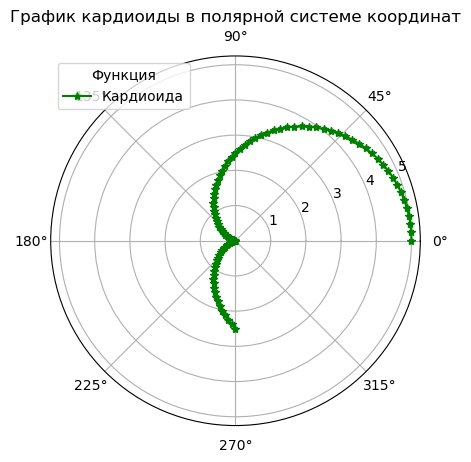

In [12]:
# Установим угол от 0 до 3π/2
phi = np.linspace(0, 3 * np.pi / 2, 100)

# Уравнение кардиоиды: ρ = 2r(1 + cosφ)
r = 2.5 * (1 + np.cos(phi))

# Построение графика в полярной системе координат
plt.polar(phi, r, marker="*", color="green")

# Добавление легенды
plt.legend(["Кардиоида"], title="Функция", loc="upper left")

# Отображение графика
plt.title("График кардиоиды в полярной системе координат")
plt.show()

**12.** Написать программу изображения графика функции y=√x. Не забывайте про то, что функция имеет значения ≥ 0. Предварительно программа запрашивает у пользователя следующую информацию:

* цвет графика (программа предлагает не менее пяти различных цветов);
* тип линии (программа предлагает не менее трех различных вариантов);
* толщину линии (программа предлагает не менее пяти различных вариантов).

Все запросы к пользователю обрабатываются с использованием обработки исключительных ситуаций. Варианты можно вводить строкой или числом (на ваш выбор).


Выберите цвет графика:
1. red
2. blue
3. green
4. orange
5. purple


Введите номер цвета (1-5):  4


Выберите тип линии:
1. -
2. --
3. -.


Введите номер типа линии (1-3):  2


Выберите толщину линии:
1. 1
2. 2
3. 3
4. 4
5. 5


Введите номер толщины линии (1-5):  3


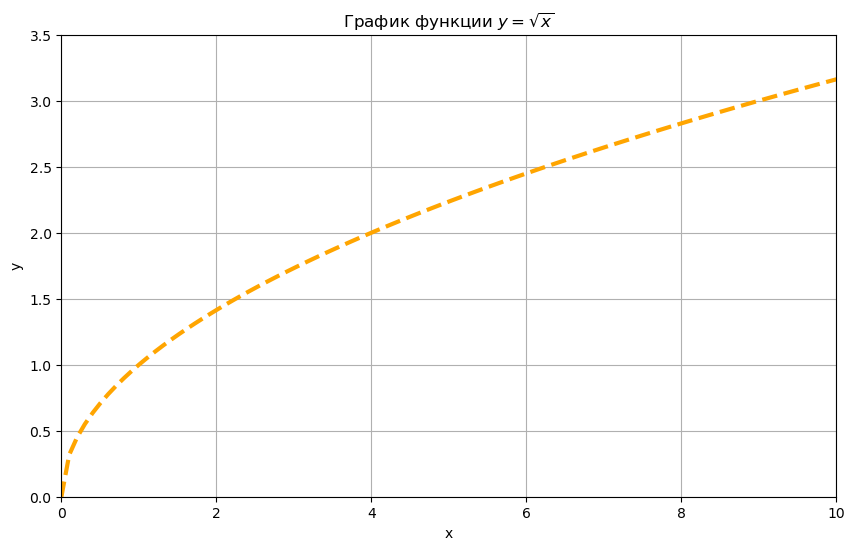

In [18]:
def get_color():
    """Функция выбора цвета графика"""
    colors = {1: "red", 2: "blue", 3: "green", 4: "orange", 5: "purple"}
    print("Выберите цвет графика:")
    for key, value in colors.items():
        print(f"{key}. {value}")

    while True:
        try:
            choice = int(input("Введите номер цвета (1-5): "))
            if choice in colors:
                return colors[choice]
            else:
                print("Некорректный выбор. Попробуйте снова.")
        except ValueError:
            print("Пожалуйста, введите число.")


def get_line_style():
    """Функция выбора типа линии графика"""
    line_styles = {1: "-", 2: "--", 3: "-."}
    print("Выберите тип линии:")
    for key, value in line_styles.items():
        print(f"{key}. {value}")

    while True:
        try:
            choice = int(input("Введите номер типа линии (1-3): "))
            if choice in line_styles:
                return line_styles[choice]
            else:
                print("Некорректный выбор. Попробуйте снова.")
        except ValueError:
            print("Пожалуйста, введите число.")


def get_line_width():
    """Функция выбора толщины линии графика"""
    widths = [1, 2, 3, 4, 5]
    print("Выберите толщину линии:")
    for i, width in enumerate(widths):
        print(f"{i + 1}. {width}")

    while True:
        try:
            choice = int(input("Введите номер толщины линии (1-5): "))
            if 1 <= choice <= len(widths):
                return widths[choice - 1]
            else:
                print("Некорректный выбор. Попробуйте снова.")
        except ValueError:
            print("Пожалуйста, введите число.")


def plot_graph(color, line_style, line_width):
    """Функция отрисовки графика"""
    x = np.linspace(0, 10, 100)
    y = np.sqrt(x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, color=color, linestyle=line_style, linewidth=line_width)

    plt.title(r"График функции $y=\sqrt{x}$")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(0, 10)
    plt.ylim(0, 3.5)
    plt.grid()
    plt.axhline(0, color="black", linewidth=0.5, ls="--")
    plt.axvline(0, color="black", linewidth=0.5, ls="--")

    plt.show()


def main():
    color = get_color()
    line_style = get_line_style()
    line_width = get_line_width()

    plot_graph(color, line_style, line_width)


if __name__ == "__main__":
    main()
